## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_data_path = "data/mouse_data.csv"
study_results_path = "data/study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_data, study_results, how='left', on=['Mouse ID', 'Mouse ID'])
# Display the data table for preview
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_results_df["Mouse ID"].nunique()

249

In [6]:
len(mouse_results_df)

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_results_df.loc[mouse_results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_results_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
len(clean_mouse_data) # Double checking that it dropped the right number of rows

1888

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data['Mouse ID'].nunique()


249

In [10]:
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_tumor_mean = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_tumor_median = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_tumor_std = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_tumor_var = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_tumor_sem = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_summary_df = pd.DataFrame({
    "Drug/Tumor Volume Mean": drug_tumor_mean,
    "Drug/Tumor Volume Median": drug_tumor_median, 
    "Drug/Tumor Volume Standard Deviation": drug_tumor_std,
    "Drug/Tumor Volume Variance": drug_tumor_var,
    "Drug/Tumor Volume SEM": drug_tumor_sem
})
drug_summary_df

,Drug/Tumor Volume Mean,Drug/Tumor Volume Median,Drug/Tumor Volume Standard Deviation,Drug/Tumor Volume Variance,Drug/Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.382993,50.783528,6.574208,43.220205,0.526358
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

NameError: name 'x_axis' is not defined

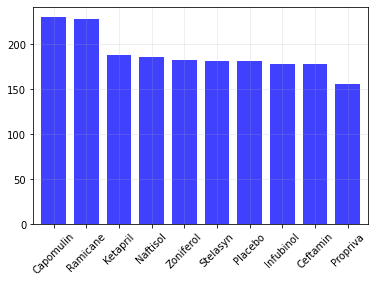

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean_mouse_data['Drug Regimen'].value_counts().plot(kind='bar', color='b', align='center', alpha=.75,
                                                    rot=45, width=.75)
plt.grid(alpha=.25)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Total Number of Measurements For Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measurements = clean_mouse_data['Drug Regimen'].value_counts()
x_axis = list(total_measurements.index.values)

plt.bar(x_axis, total_measurements, color='b', align='center', alpha=.75, width=.75)
plt.grid(alpha=.25)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xticks(x_axis, rotation=45)
plt.title("Total Number of Measurements For Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_mouse_data["Sex"].value_counts().plot(kind='pie', shadow=True, startangle=90, colors=['lightskyblue', 'pink'],
                                            autopct="%1.1f%%", labels=["Male", "Female"], explode=[.05,0],
                                            title="Distribution of Female vs. Male Mice", figsize=[4.5, 4.5])
plt.show()
                                            
                                           


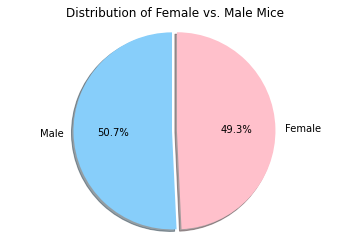

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice = clean_mouse_data['Sex'].value_counts()
labels= clean_mouse_data['Sex'].unique()
colors= ['lightskyblue', 'pink']
explode= [.05, 0]

plt.pie(gender_mice, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.title("Distribution of Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

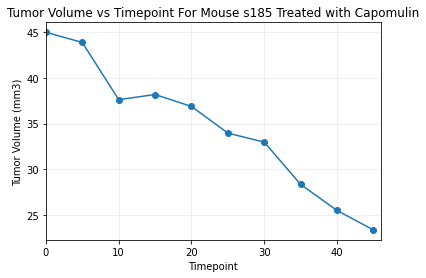

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_volume_cap = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Mouse that was treated with Capomulin
treated_mouse = "s185"
selected_mouse = tumor_volume_cap.loc[tumor_volume_cap["Mouse ID"] == treated_mouse]

plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'], marker='o')
plt.grid(alpha=.25)
plt.xlim(0, max(selected_mouse["Timepoint"]) + 1)
plt.title(f"Tumor Volume vs Timepoint For Mouse {treated_mouse} Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
